In [2]:
import numpy as np
from abc import ABC, abstractmethod

import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib notebook

In [13]:
class objective_func(ABC):
    @abstractmethod
    def func(self, x):
        pass
    @abstractmethod
    def dfunc(self, x):
        pass
    @abstractmethod
    def get_optimal(self):
        pass
    @abstractmethod
    def get_optimum(self):
        pass
    def visualise2d(self, lim, n):
        x, y = np.linspace(-lim, lim, n), np.linspace(-lim, lim, n)
        xx, yy = np.meshgrid(x, y)
        zz = np.zeros(xx.shape)
        for j in range(n):
            for i in range(n):
                zz[j, i] = self.func((x[i], y[j]))
        fig = plt.figure(figsize=(4,4))
        ax = fig.add_subplot(111)
        ax.scatter(x=xx.ravel(), y=yy.ravel(), c=zz.ravel())
        ax.scatter(x=[self.optimal[0]], y=[self.optimal[1]], c='red', marker='x')
        fig.show()
        return ax
    def visualise3d(self, lim, n):
        x, y = np.linspace(-lim, lim, n), np.linspace(-lim, lim, n)
        z = []
        for i in y:
            z_line = []
            for j in x:
                z_line.append(self.func([j,i]))
            z.append(z_line)
        fig = go.Figure(data=[go.Surface(z=z, x=x, y=y),  \
                              go.Scatter3d(x=[self.optimal[0]], y=[self.optimal[1]], z=[self.optimum])])
        fig.update_layout(autosize=False,
                          scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                          width=500, height=500,
                          margin=dict(l=65, r=50, b=65, t=90))
        fig.show()
    def visulise_gradient(self, lim, n):
        x, y = np.linspace(-lim, lim, n), np.linspace(-lim, lim, n)
        xx, yy = np.meshgrid(x, y)
        zz = np.zeros((n, n, 2))
        for j in range(len(y)):
            for i in range(len(x)):
                zz[j, i, :] = self.dfunc([x[i], y[j]])
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)
        ax.quiver(xx,yy,zz[:,:,0],zz[:,:,1])
        ax.scatter(x=[self.optimal[0]], y=[self.optimal[1]], c='red', marker='x')
        fig.show()
        return ax

In [118]:
class ackley(objective_func):
    def __init__(self):
        self.optimal = np.array([0, 0])
        self.optimum = 0
    def func(self, x):
        '''
        the period of local minimum along each axis is 1, integer coordinate (1,1), (2,3)... 
        x and y is interchangeable
        global minimum is 0 with arguments x=y=0
        local minimums far away from orgin are 20
        supremum is 20 + e - 1/e = 22.35
        symmetric along x=0, y=0, y=x lines
        disappearing global gradient when far away from optimal
        '''
        arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
        arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
        return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e
    def dfunc(self, x):
        if x[0] == 0 and x[1] == 0: 
            return x
        arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
        arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
        return np.array([-0.4 * x[0] / arg1 * np.exp(arg1) + np.pi * np.sin(2 * np.pi * x[0]) * np.exp(arg2), 
                -0.4 * x[1] / arg1 * np.exp(arg1) + np.pi * np.sin(2 * np.pi * x[1]) * np.exp(arg2)])
    def get_optimal(self):
        return self.optimal
    def get_optimum(self):
        return self.optimum
a = ackley()
print("check func value at optimal is", a.get_optimum(), "(optimum): ", a.func(a.get_optimal()))
print("check gradient is (0,0): ",a.dfunc(a.get_optimal()))

check func value at optimal is 0 (optimum):  4.440892098500626e-16
check gradient is (0,0):  [0 0]


<IPython.core.display.Javascript object>


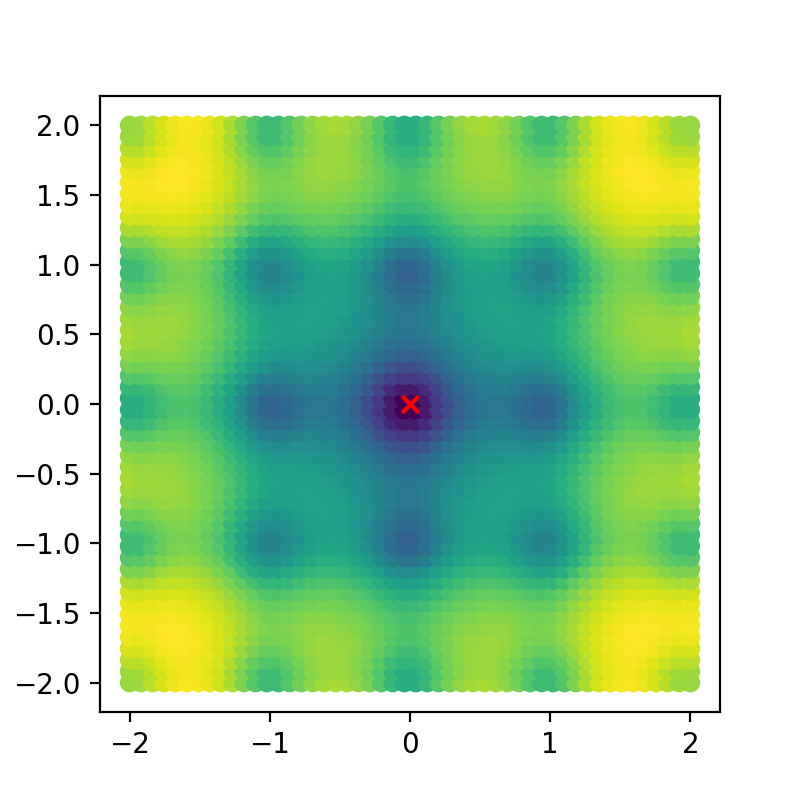

In [15]:
a.visualise2d(lim=2, n=50)

In [16]:
a.visualise3d(lim=2, n=50)

<IPython.core.display.Javascript object>


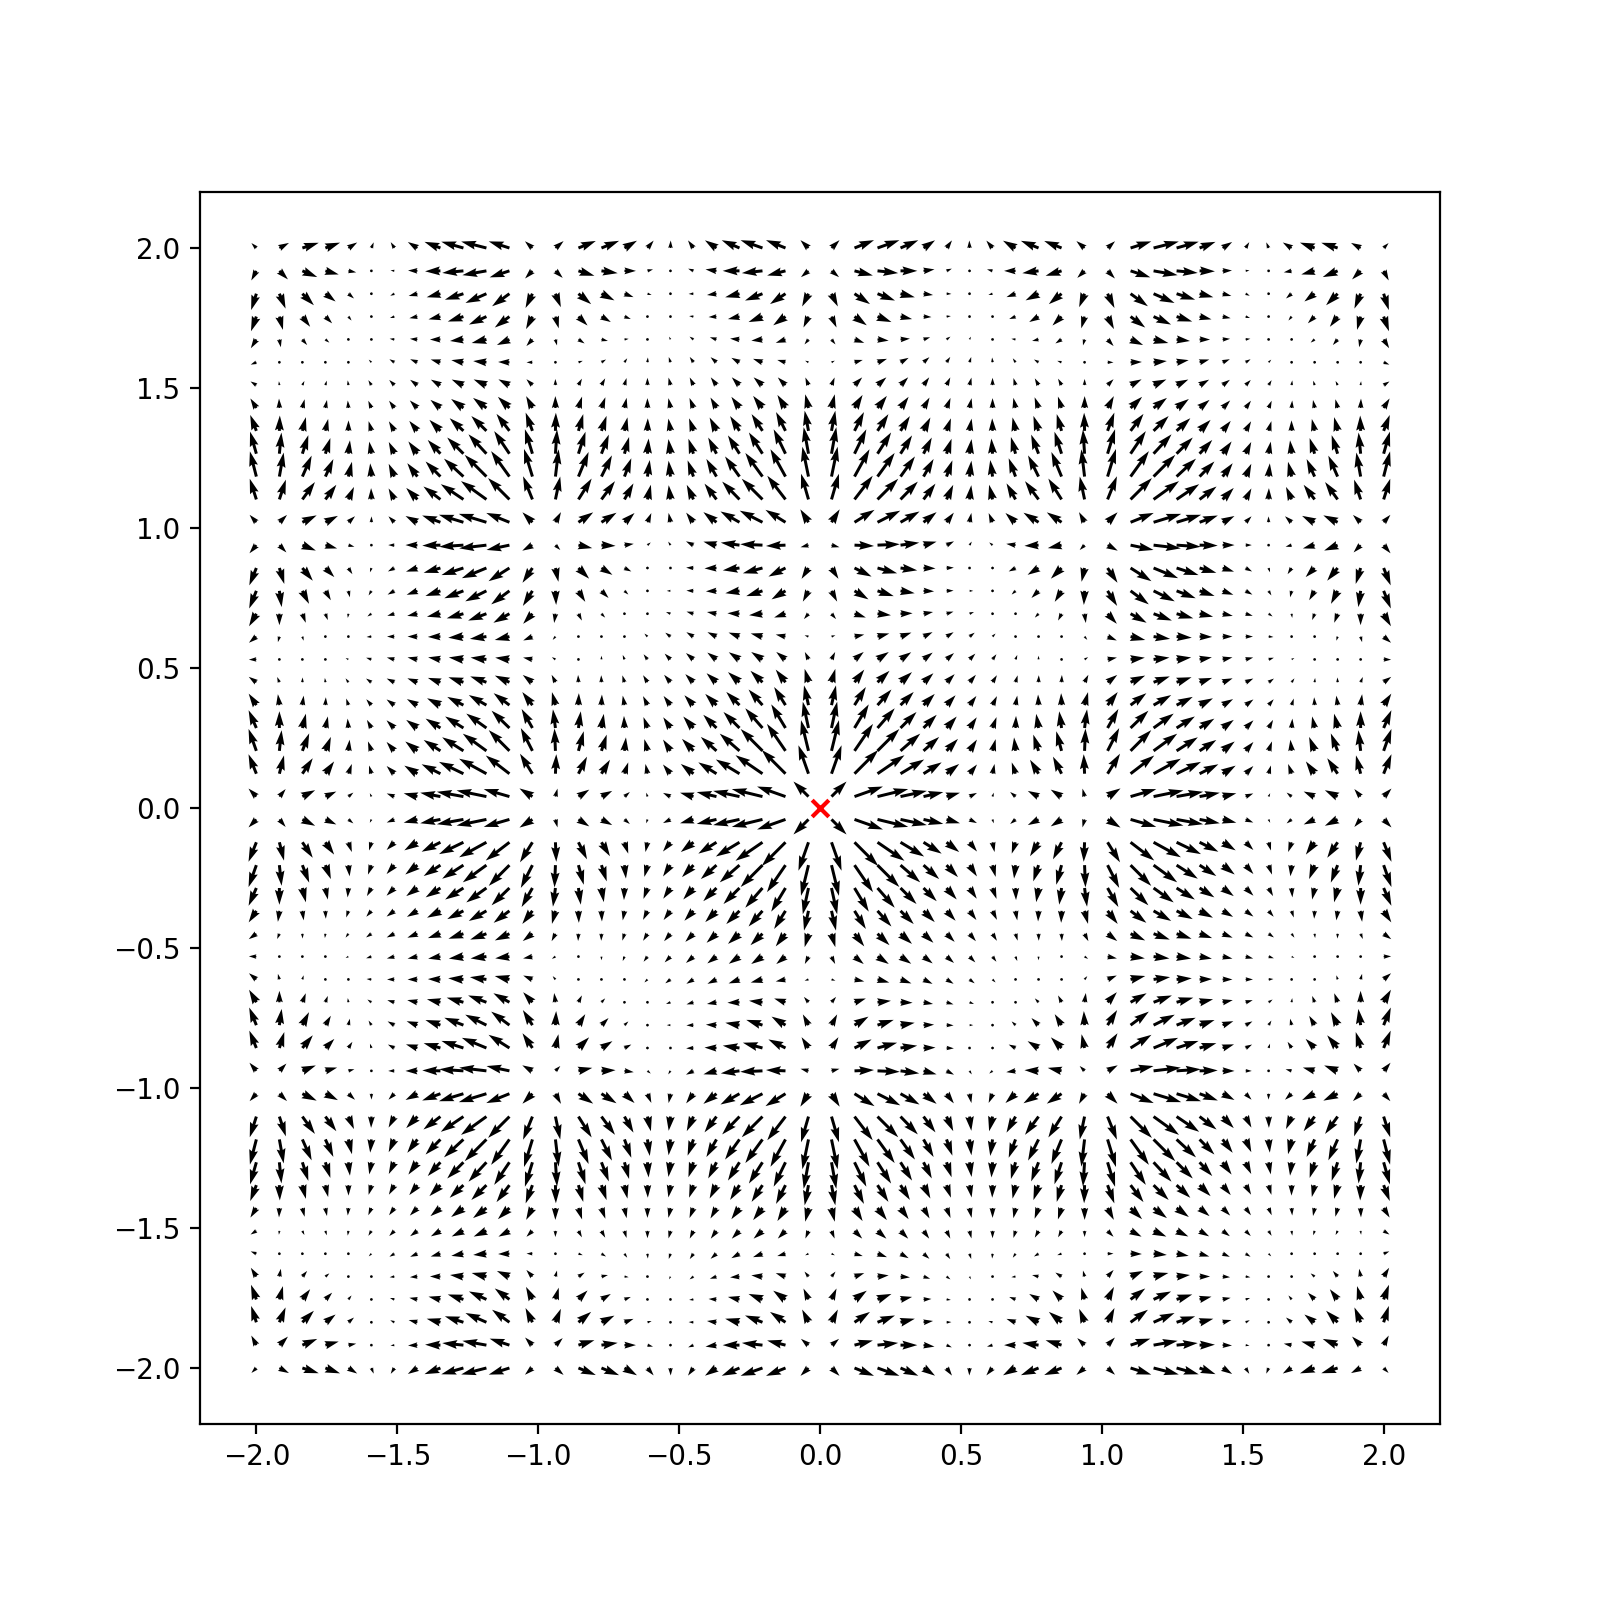

In [17]:
a.visulise_gradient(lim=2, n=50)

In [18]:
class bukin(objective_func):
    '''
    non-disappearing gradient
    large gradient and uncontinuous gradient around ridge/local optimal
    optimum: 0
    optimal: (-10, 1)
    '''
    def __init__(self):
        self.optimal = np.array([-10, 1])
        self.optimum = 0
    def func(self, x):
        return 100 * np.sqrt(np.abs(x[1] - 0.01 * x[0]**2)) + 0.01 * np.abs(x[0] + 10)
    def dfunc(self, x):
        arg1 = x[1] - 0.01 * x[0]**2
        arg2 = 1 / np.sqrt(np.abs(arg1)) if arg1 != 0 else 0
        return np.array([- np.sign(arg1) * x[1] * arg2 + 0.01 * np.sign(x[0] + 10), 50 * np.sign(arg1) * arg2])
    def get_optimal(self):
        return self.optimal
    def get_optimum(self):
        return self.optimum
b = bukin()
print("check func value at optimal is", b.get_optimum(), "(optimum): ", b.func(b.get_optimal()))
print("check gradient is (0,0): ",b.dfunc(b.get_optimal()))

check func value at optimal is 0 (optimum):  0.0
check gradient is (0,0):  [0. 0.]


<IPython.core.display.Javascript object>


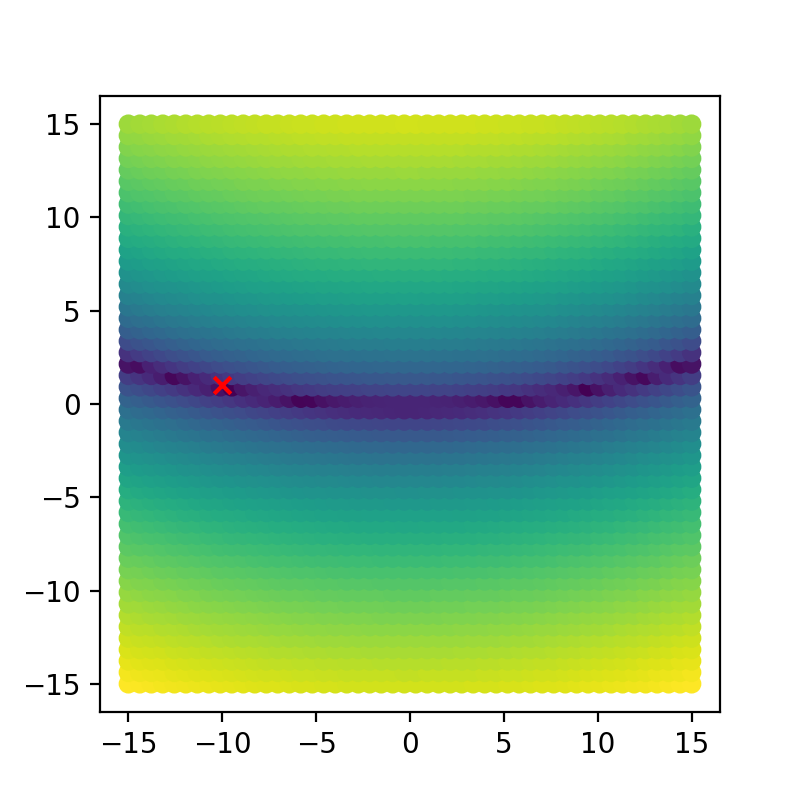

In [19]:
b.visualise2d(lim=15, n=50)

In [20]:
b.visualise3d(lim=15, n=30)

<IPython.core.display.Javascript object>


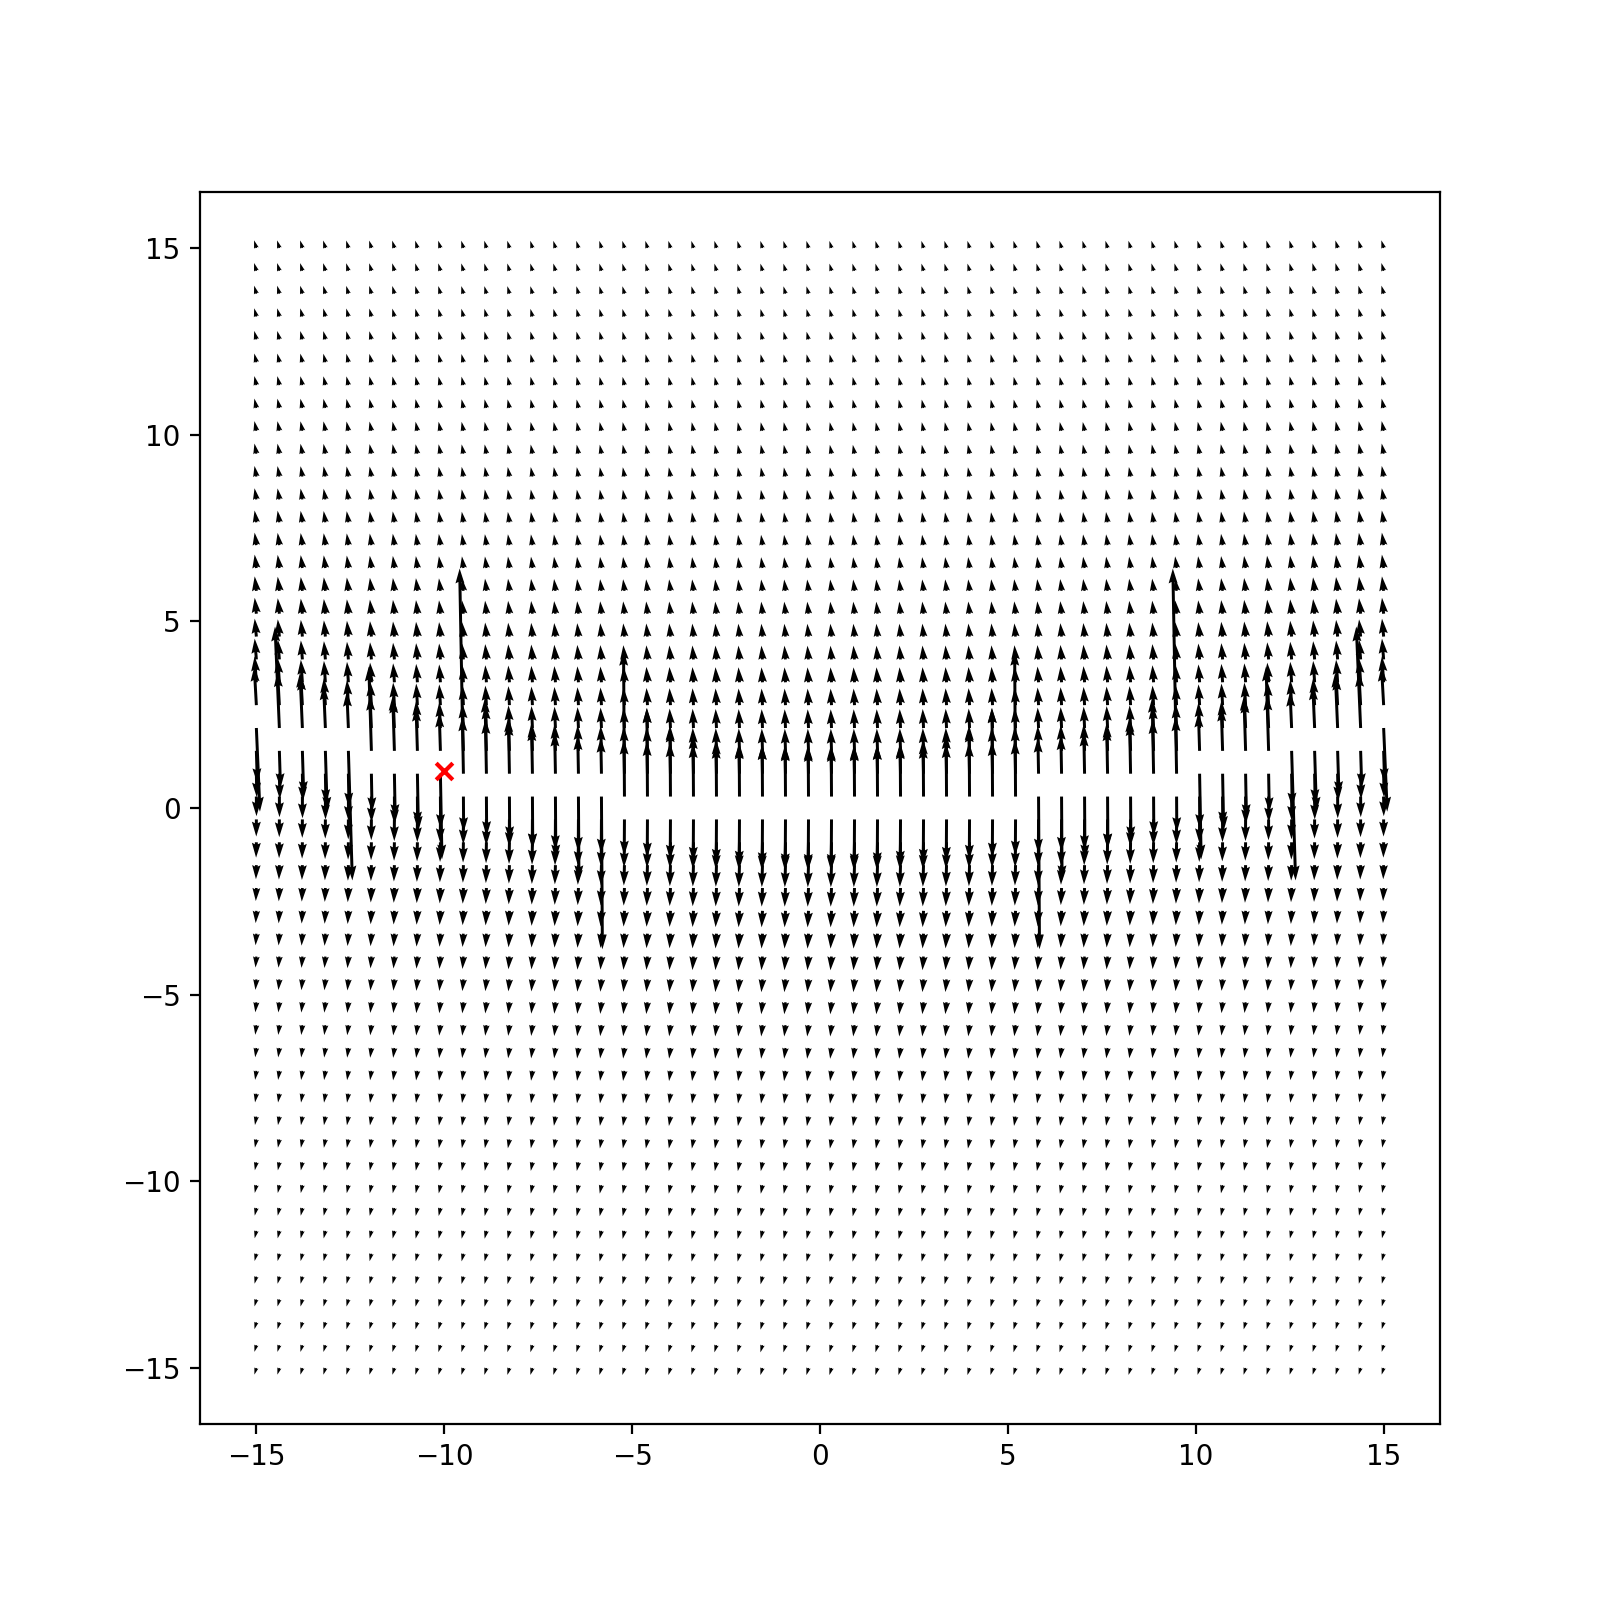

In [21]:
b.visulise_gradient(lim=15, n=50)

In [36]:
class eggholder(objective_func):
    # evaluated domain: 
    def __init__(self):
        self.optimal = np.array([512, 404.2319])
        self.optimum = -959.6407
    def func(self, x):
        if np.abs(x[0]) > 514 or np.abs(x[1]) > 514:
            return 1e3
        arg1 = np.sqrt(np.abs(x[1] + x[0]/2 + 47))
        arg2 = np.sqrt(np.abs(x[0] - (x[1] + 47)))
        return -(x[1] + 47) * np.sin(arg1) - x[0] * np.sin(arg2)
    def dfunc(self, x):
        arg3 = x[1] + x[0]/2 + 47
        arg4 = x[0] - (x[1] + 47)
        arg1 = np.sqrt(np.abs(arg3))
        arg2 = np.sqrt(np.abs(arg4))
        return np.array([-(x[1] + 47)*np.cos(arg1)/arg1/4*np.sign(arg3) - np.sin(arg2) - x[0]*np.cos(arg2)/arg2/2*np.sign(arg4), \
                         -np.sin(arg1) - (x[1] + 47)*np.cos(arg1)/arg1/2*np.sign(arg3) - x[1]*np.cos(arg2)/arg2/2*np.sign(arg4)])
    def get_optimal(self):
        return self.optimal
    def get_optimum(self):
        return self.optimum
e = eggholder()
e.get_optimal()
print("check func value at optimal is", e.get_optimum(), "(optimum): ", e.func(e.get_optimal()))
print("check gradient is (0,0): ", e.dfunc(e.get_optimal()))

check func value at optimal is -959.6407 (optimum):  -959.6406627106155
check gradient is (0,0):  [-3.38576455 -3.44112101]


<IPython.core.display.Javascript object>


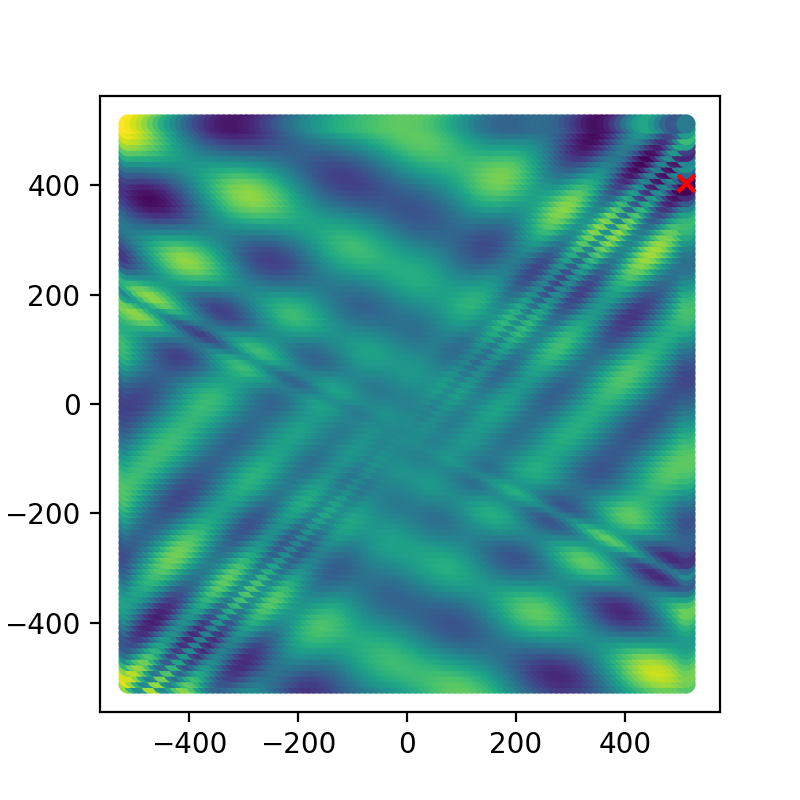

In [24]:
e.visualise2d(lim=512, n=100)

In [37]:
e.visualise3d(lim=600, n=100)

<IPython.core.display.Javascript object>


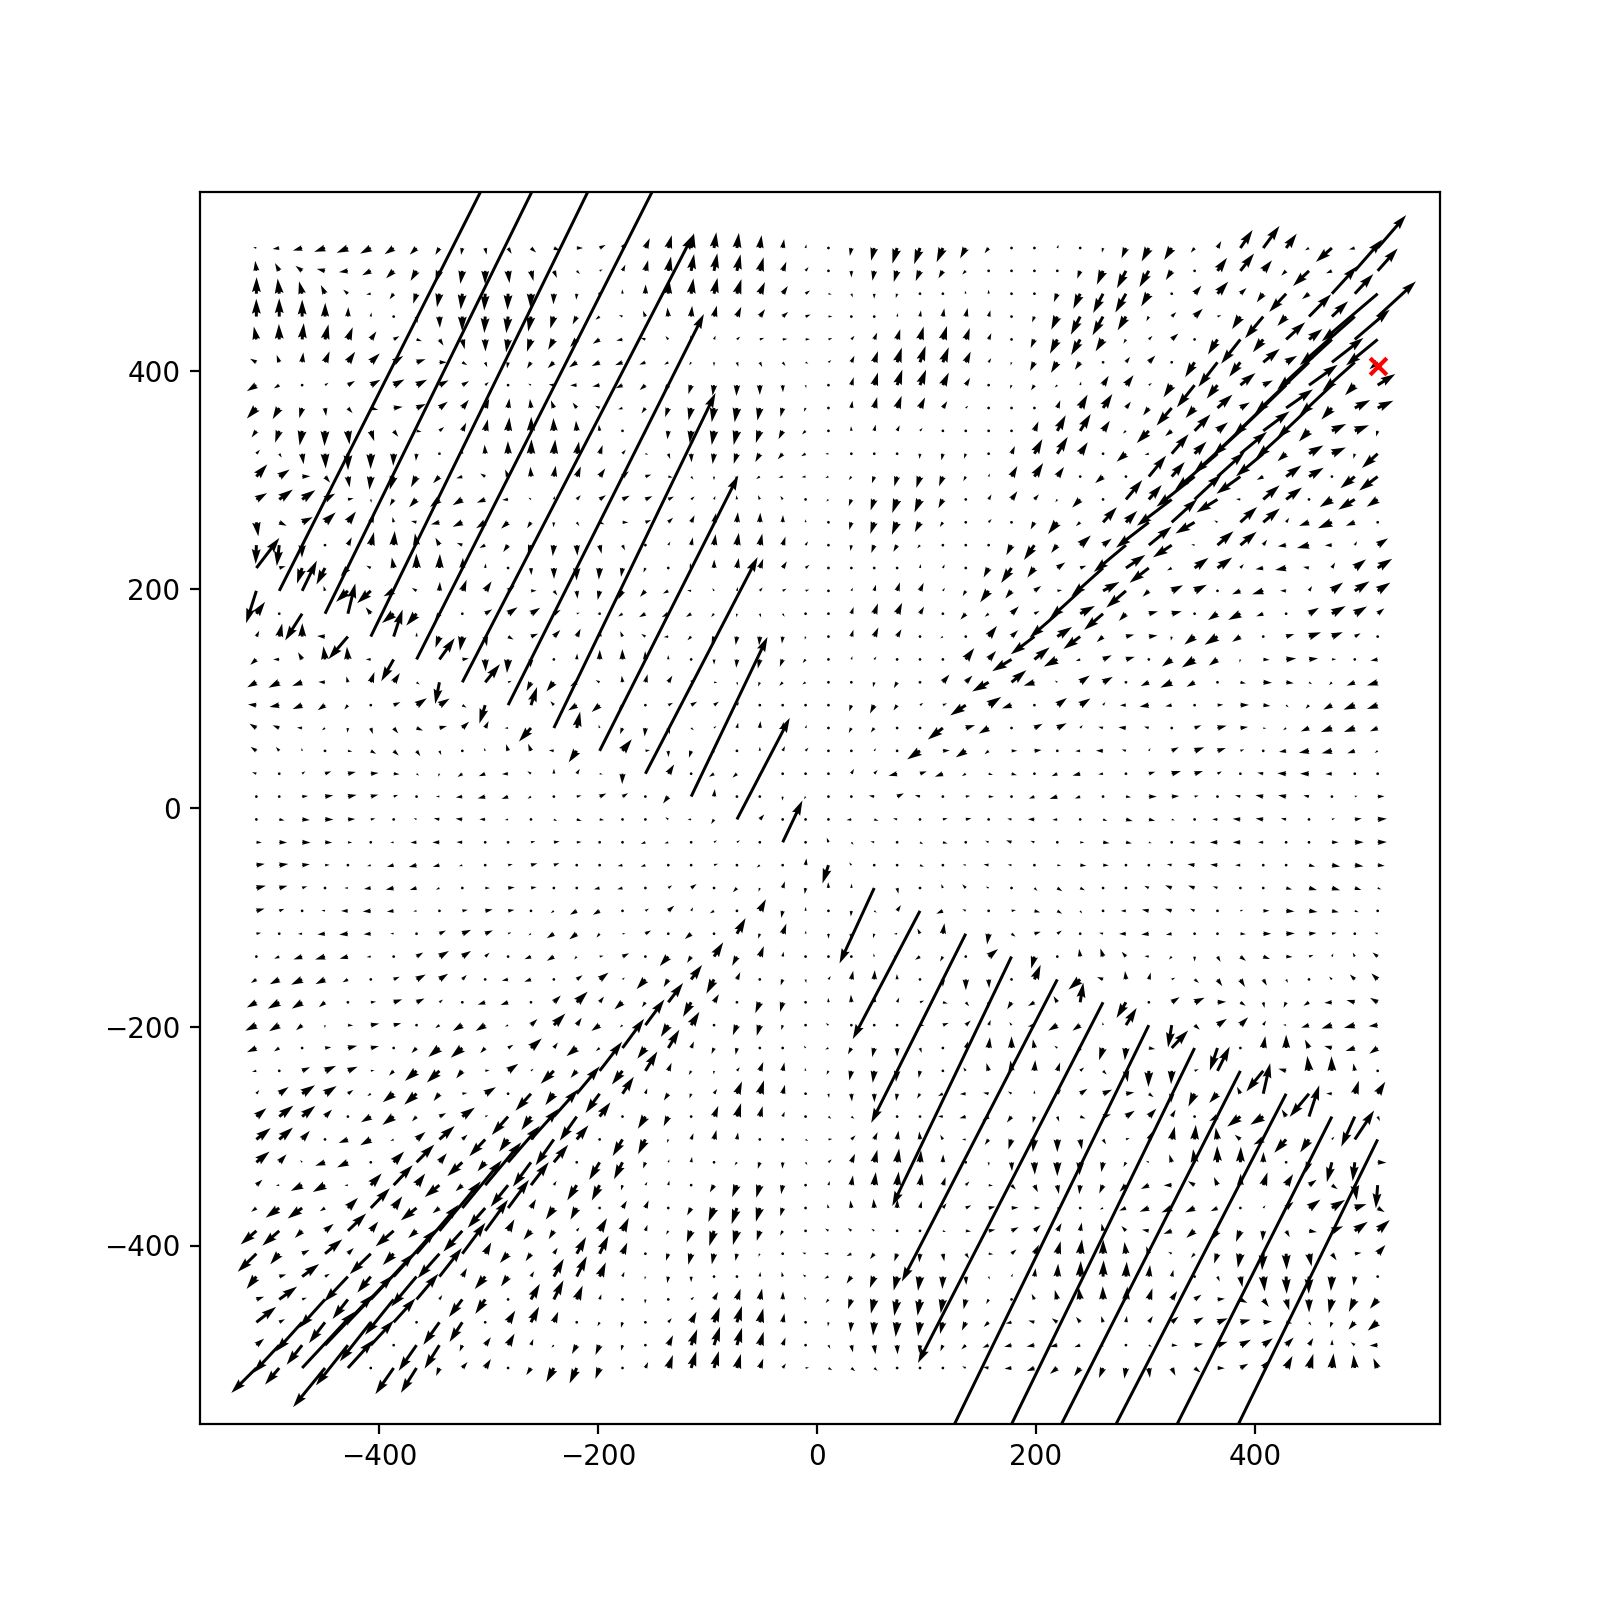

In [170]:
e.visulise_gradient(lim=512, n=50)

In [120]:
class tuned_ackley(objective_func):
    # evaluated domain: circle with radius 19
    def __init__(self, radius=19):
        self.optimal = np.array([0, 0])
        self.optimum = 0
        self.radius = radius
    def func(self, x):
        '''
        the period of local minimum along each axis is 1, integer coordinate (1,1), (2,3)... 
        x and y is interchangeable
        global minimum is 0 with arguments x=y=0
        local minimums far away from orgin are 20
        supremum is 20 + e - 1/e = 22.35
        symmetric along x=0, y=0, y=x lines
        disappearing global gradient when far away from optimal
        '''
        if np.linalg.norm(x) > self.radius:
            return 5e1
        arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
        arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
        return -20. * np.exp(arg1) - 0.1 * arg1**4 * np.exp(arg2) + 20. + np.e
    def dfunc(self, x):
        if x[0] == 0 and x[1] == 0: 
            return np.array([0, 0])
        elif np.linalg.norm(x) > self.radius:
            return np.array([0, 0])
        arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
        arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
        return np.array([-0.4 * x[0] / arg1 * np.exp(arg1) + np.pi/10 * arg1**4 * np.sin(2 * np.pi * x[0]) * np.exp(arg2) \
                         - x[0]/6250 * np.exp(arg2) * (x[0]**2 + x[1]**2), 
                         -0.4 * x[1] / arg1 * np.exp(arg1) + np.pi/10 * arg1**4 * np.sin(2 * np.pi * x[1]) * np.exp(arg2) \
                         - x[1]/6250 * np.exp(arg2) * (x[0]**2 + x[1]**2) ])
    def get_optimal(self):
        return self.optimal
    def get_optimum(self):
        return self.optimum
at = tuned_ackley()
print("check func value at optimal is", at.get_optimum(), "(optimuam): ", at.func(a.get_optimal()))
print("check gradient is (0,0): ",at.dfunc(at.get_optimal()))

check func value at optimal is 0 (optimum):  2.718281828459045
check gradient is (0,0):  [0 0]


In [121]:
at.func((19,0))

7.186623677541611

In [108]:
at.visualise3d(lim=22, n=150)